In [50]:
import os
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
VOC_BBOX_LABEL_NAMES = (
    'aeroplane',
    'bicycle',
    'bird',
    'boat',
    'bottle',
    'bus',
    'car',
    'cat',
    'chair',
    'cow',
    'diningtable',
    'dog',
    'horse',
    'motorbike',
    'person',
    'pottedplant',
    'sheep',
    'sofa',
    'train',
    'tvmonitor')

In [25]:
root_idx = os.getcwd().rfind("\\")
root = os.getcwd()[:root_idx]
pth = os.path.join(root, "VOCdevkit/VOC2007/Annotations")
id_list = os.listdir(pth)
print(id_list[:5])

['000001.xml', '000002.xml', '000003.xml', '000004.xml', '000005.xml']


In [23]:
id_ = id_list[0][:6]
print("id: ", id_)
anno = ET.parse(os.path.join(pth, id_+".xml"))
bbox, label, diff = [], [], []
for obj in anno.findall('object'):
    diff.append(int(obj.find("difficult").text))
    bbox_anno = obj.find("bndbox")
    bbox.append([int(bbox_anno.find(tag).text) - 1 for tag in ('ymin', 'xmin', 'ymax', 'xmax')])
    name = obj.find('name').text.lower().strip()
    label.append(VOC_BBOX_LABEL_NAMES.index(name))

bbox = np.stack(bbox).astype(np.float32)
label = np.stack(label).astype(np.int32)
diff = np.array(diff, dtype=np.bool).astype(np.uint8)

id:  000001


C:\Users\khj\AppData\Local\Temp\ipykernel_12460\1547294746.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  diff = np.array(diff, dtype=np.bool).astype(np.uint8)


array([0, 0], dtype=uint8)

In [24]:
from data.utils import read_image

In [42]:
img_file = os.path.join(root, "VOCdevkit/VOC2007/JPEGImages", id_ + ".jpg")
img = read_image(img_file, color=True)

In [43]:
print(img.shape)
img = img.transpose(1, 2, 0)
print(img.shape)

(3, 500, 353)
(500, 353, 3)


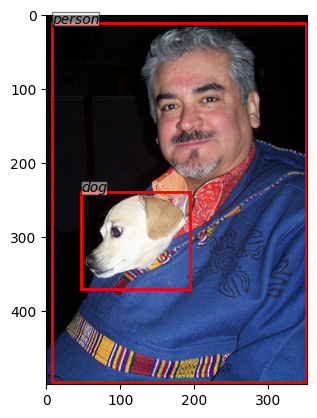

In [51]:
label_names = list(VOC_BBOX_LABEL_NAMES) + ['bg']
fig, ax = plt.subplots()
for i, box, in enumerate(bbox):
    xy = (box[1], box[0])
    h = box[2] - box[0]
    w = box[3] - box[1]
    ax.add_patch(plt.Rectangle(xy, w, h, fill=False, edgecolor = "red", linewidth=2))
    caption = list()
    lb = label[i]
    caption.append(label_names[lb])
    ax.text(box[1], box[0], ': '.join(caption),
            style='italic',
            bbox={"facecolor":"white", "alpha":0.5, "pad":0})
    
ax = ax.imshow(img.astype(np.uint8))
plt.show()